In [64]:
import xarray as xr # for working with labelled multi-dimensional arrays                                                                
import numpy as np # for numerical operations                                                                                                        
import matplotlib.pyplot as plt # for matlab-like plotting                                              
from dask.distributed import Client
client = Client(n_workers=16)        
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/38873/status,
Dashboard: /proxy/38873/status,Workers: 16
Total threads: 16,Total memory: 250.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38667,Workers: 16
Dashboard: /proxy/38873/status,Total threads: 16
Started: Just now,Total memory: 250.00 GiB
Comm: tcp://127.0.0.1:35921,Total threads: 1
Dashboard: /proxy/32871/status,Memory: 15.62 GiB
Nanny: tcp://127.0.0.1:38811,


### Quick check N34 index 1979-2016

CPU times: user 5.47 s, sys: 487 ms, total: 5.95 s
Wall time: 10.9 s


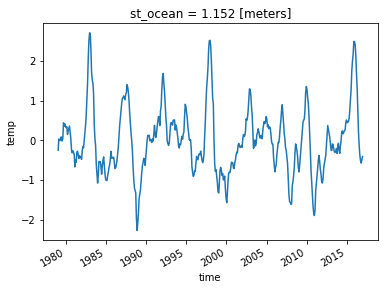

In [65]:
%%time
base_msc = '/g/data/e14/mv7494/access-om2/archive/025deg_jra55_iaf_pEXP9601_real_windstress/'
# ---------------------------------------------------------------------------------- #
nr_outputs = 38    # define number of output files to consider
last_output = 57  # the last output to consider loading in
# ---------------------------------------------------------------------------------- #
a = [i for i in range(last_output+1-nr_outputs,last_output+1)] # create integer list
s = list(range(0,nr_outputs))
c = [] # empty list which I fill up
for i in s: # loop through the number of files I would like
    c.append(i)
    # fill in empty list with integers trailing two zeros (000, 001, 002, ...)
    c[i] = base_msc+'output'+str(a[i]).zfill(3) + '/ocean/ocean.nc' 
# load in data set ----------------------------------------------------------------- #
temp = xr.open_mfdataset(c,combine='by_coords',chunks={'time': 1},decode_times = True).temp

# select Niño3.4 region 5°S-5°N and 170°W-120°W -> -5.118°S ... 5.118°N, -170.125°E ... -120.125°E
temp = temp.isel(yt_ocean=slice(477,519)).isel(xt_ocean=slice(439,640)).isel(st_ocean=0).mean(['yt_ocean','xt_ocean']) # SST = st_ocean=0
N34 = temp.groupby('time.month') - temp.groupby('time.month').mean('time') # calculate anomalies
N34.plot()

In [14]:
# ----------------------------------------------------------------------------------------------------------------------- #
#                                                   Notes down below                                                      #
# ----------------------------------------------------------------------------------------------------------------------- #